In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#%matplotlib_inline

data = pd.read_csv('store.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
data.set_index('CustomerID')

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [57]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
df = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


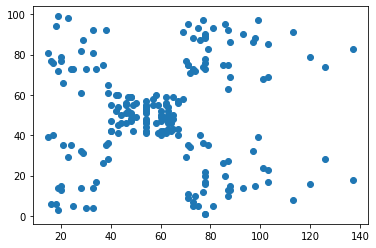

In [59]:
plt.scatter( df['Annual Income (k$)'], df['Spending Score (1-100)'])


In [60]:
x = df.values
x.shape

(200, 3)

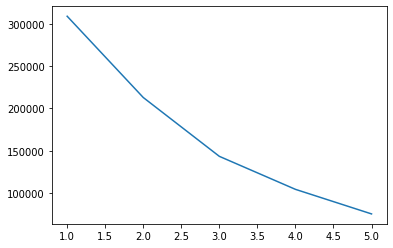

In [61]:
variacoes = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    variacoes.append(kmeans.inertia_)

plt.plot(range(1,6), variacoes)

In [62]:
kmeans_final = KMeans(n_clusters=5)
kmeans_final.fit(x)

KMeans(n_clusters=5)

In [63]:
cluster_pred = kmeans_final.predict(x)
cluster_centro = kmeans_final.cluster_centers_
cluster_centro

array([[26.30434783, 20.91304348, 45.2173913 ],
       [87.75      , 17.58333333, 40.66666667],
       [86.53846154, 82.12820513, 32.69230769],
       [55.29113924, 49.56962025, 43.08860759],
       [26.30434783, 78.56521739, 25.52173913]])

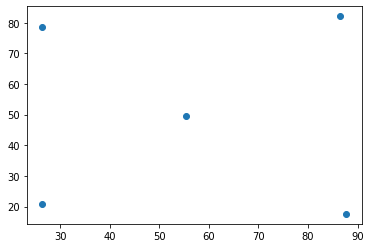

In [64]:
plt.scatter(cluster_centro[:,0], cluster_centro[:,1])

In [71]:
x[cluster_pred==3,0]

array([40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46, 47,
       47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60, 60,
       60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64, 64,
       65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 76], dtype=int64)

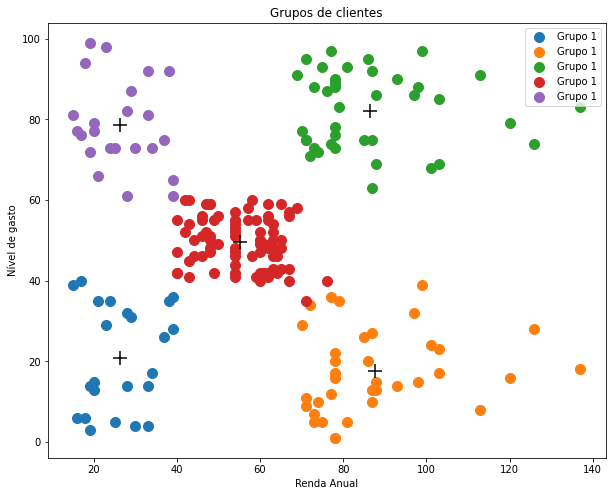

In [80]:
plt.figure(figsize=(10, 8))
plt.scatter(x[cluster_pred==0, 0], x[cluster_pred==0, 1], s=100, label='Grupo 1')
plt.scatter(x[cluster_pred==1, 0], x[cluster_pred==1, 1], s=100, label='Grupo 1')
plt.scatter(x[cluster_pred==2, 0], x[cluster_pred==2, 1], s=100, label='Grupo 1')
plt.scatter(x[cluster_pred==3, 0], x[cluster_pred==3, 1], s=100, label='Grupo 1')
plt.scatter(x[cluster_pred==4, 0], x[cluster_pred==4, 1], s=100, label='Grupo 1')
plt.scatter(cluster_centro[:, 0 ], cluster_centro[:, 1], marker='+', s=200, c='black')
plt.legend()
plt.title('Grupos de clientes')
plt.xlabel('Renda Anual')
plt.ylabel('Nível de gasto')
plt.show()
